# Using `ternary` to Make Triangular Probability Simplex Plots

This is an example presentation. I chose something kind of wacky so as to leave the more normal topics free. 

## The Probability Simplex
A probability $k$-[simplex](https://en.wikipedia.org/wiki/Simplex) is the set of possibile probabiltiy assignments to each of $k+1$ dimensions (categorical distributions). If you randomly choose among just one choice, the simplex is 0-dimensional. You assign 100% to the single choice. If you choose among two choices, the simplex is a line (a segment in two dimensions where $p_1 + p_2 = 1$). If you choose among three choices, the simplex is a triangle (a pyramid's face in the three dimensions where $p_1 + p_2 + p_3 = 1$).

## Simplex Plots $\Delta \{r,p,s\}$, For Rock Paper Scissors

Throughout, we set $k=2$ to form the 2-dimensional triangle simplex. A point in the simplex is a distribtion among three discrete choices (rock, paper, scissors). 

$\Delta^k = \{x\in \mathbb{R}^{k+1}_{+}: \sum_{i=0}^{k}x_i = 1\}$

This notebook shows how to make various plots related to the simplex.


### Contents

I. Scatter Plots

    * Generate fake data and plot.


II. Heatmaps

    * Heatmaps based on winning percentages.

### Dependencies

The only nonstandard package should be `ternary`, used at the end. Install with pip or `conda install python-ternary`. 

https://github.com/marcharper/python-ternary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# I. Scatter Plots

## Basic Scatter Plot

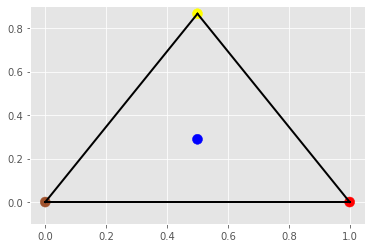

In [ ]:
import ternary

# Create the Plot
scale = 1 # This determines the length of a triangles sides. 
figure, tax = ternary.figure(scale=scale) # Create the plot object

# Draw Boundary 
tax.boundary(linewidth= 2.0)

# Scatter Points
points = [(1,0,0), (0,1,0), (0,0,1), (1/3, 1/3, 1/3)]
tax.scatter(points, marker = 'o', color = ['red', 'yellow', 'sienna', 'blue'], s = 100)

# Display the plot
ternary.plt.show()

## Scatter Plot With Random Data

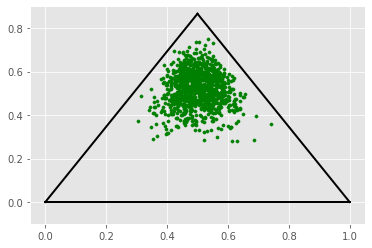

In [ ]:
# make four random datasets
# each dataset is a collection of distributions between three outcomes
# https://en.wikipedia.org/wiki/Dirichlet_distribution

uniform = np.random.dirichlet([1,1,1],1000) # dirichlet parameters and sample size
hot_corners = np.random.dirichlet([0.1, 0.1, 0.1], 1000)
centered = np.random.dirichlet([50, 50, 50], 1000)
tilted = np.random.dirichlet([5,15,5], 1000)


# Boundary and Gridlines
scale = 1 # This determines the length of a triangles sides. 
figure, tax = ternary.figure(scale=scale) # Create the plot object

# Draw Boundary
tax.boundary(linewidth= 2.0)

# Scatter Points
points = tilted
tax.scatter(points, marker = 'o', color = 'green', s = 10)

# Display the plot
ternary.plt.show()


## Add Gridlines

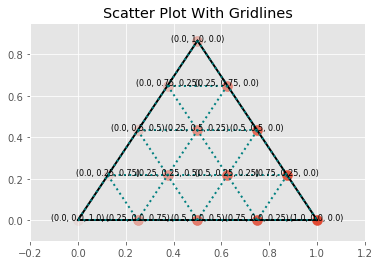

In [ ]:
## Boundary and Gridlines
scale = 1 # This determines the length of a triangles sides. 
figure, tax = ternary.figure(scale=scale) # Create the plot object

# Draw Boundary and Gridlines
multiple = 1/4

tax.boundary(linewidth= 2.0)
tax.gridlines(color="teal", multiple= multiple, linewidth = 2)

# Scatter Points

point_number = 1 
for r_val in np.linspace(0,1, 1 / multiple + 1):
    for p_val in np.linspace(0,1, 1 / multiple + 1):
        for s_val in np.linspace(0,1, 1 / multiple + 1):
            
            if r_val + p_val + s_val == 1:
                
                point = [(r_val, p_val, s_val)]
                tax.scatter(point, marker = 'o', color = 'C0', alpha = point_number / 15, s = 100)
                tax.annotate(str(point[0]), point[0], size = 8, ha = 'center')
                
                point_number += 1

# Display adjustments
plt.xlim(-0.2,1.2)
plt.ylim(-.1,.95)

# Add Title
plt.title("Scatter Plot With Gridlines")

# Show the plot
ternary.plt.show()


In [ ]:
np.linspace(0,1, 1 / multiple + 1)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

# Heatmaps

A unique advantage of the ternary package is its ability to produce heatmaps. 

## `heatmapf` function

We can create a heatmap based on the value of a function that is defined over the simplex space.

In [ ]:
def winning_pct(p, action = 'rock', return_net = True):
    
    """What is the winning percentage given a choice of action and an opponent's strategy p, where 
    p is a probability distribution over rock, paper, and scissors."""
    
    if action.lower() == 'rock':
        
        winning_pct = p[2] # pr win
        net = p[2] - p[1] # pr win - pr lose
    
    elif action.lower() == 'paper':
        
        winning_pct = p[0]
        net = p[0] - p[2]
        
    elif action.lower() == 'scissors':
        
        winning_pct = p[1]
        net = p[1] - p[0]
        
    if return_net:
        return net
    
    return winning_pct  


### `heatmapf` Example

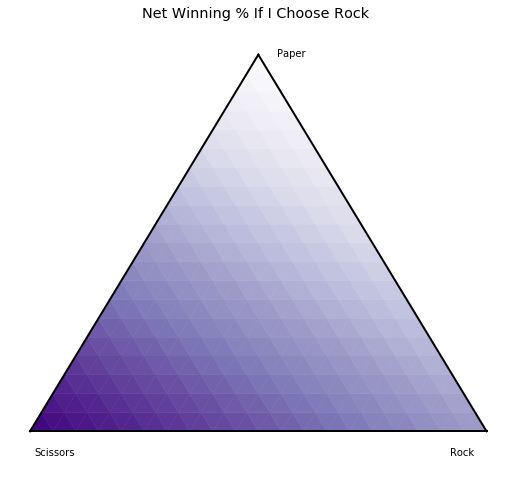

In [ ]:
import ternary 
import math

figure, tax = ternary.figure(scale = 20) # Scale corresponds to the resolution
# vary scale above for higher resolution
figure.set_size_inches(9, 8)

# all of the heatmap work is done here
tax.heatmapf(winning_pct, boundary=True, style="triangular", cmap = 'Purples', colorbar = False)
# Change colorbar to True for a colorbar legend to the right (adjust figsize to compensate)

tax.boundary(linewidth=2.0)

# Make pretty as desired
title = 'Net Winning % If I Choose Rock'
tax.set_title(title + " \n")

labels = 'Rock', 'Paper', 'Scissors' 

tax.right_corner_label(labels[0], position = (.88,0.05,.09), fontsize=10)
tax.top_corner_label(labels[1], position = (.01,1.11,.005),fontsize=10)
tax.left_corner_label(labels[2], position = (.07,0.05,1), fontsize=10)

# Clear background and axes
#tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.show()


## `heatmap` function

Using `heatmap` instead of `heatmapf`, we can create a heatmap from data instead. This requires a dictionary mapping a point in the simplex to a color value or float (float converted to a color based on a colormap).

In [ ]:
def color_point(x, y, z):
    
    """Given an opponent plays rock at chance x, paper at y, and scissors at z, what is the best response?
    Best responses are mapped to RGB colors."""
    total = x + y + z
    
    # winning pcts for possible responses
    rock_net = z - y
    paper_net = x - z
    scissors_net = y - x
    
    # get best response as highest net winning pct
    list_  = [rock_net, paper_net, scissors_net]
    best = list_.index(max(list_))

    # map into RGB color weights
    colors = [0, 0, 0]
    colors[best] = 1 #* total

    # return RGB tuple with fourth value for opacity (alpha) 
    return (*tuple(colors), 1.)


In [ ]:
color_point(6,2,2) # if opponent mostly plays rock, I always play paper


(0, 1, 0, 1.0)

In [ ]:
color_point(0,1,0) # if opponent always plays paper, I always play scissors


(0, 0, 1, 1.0)

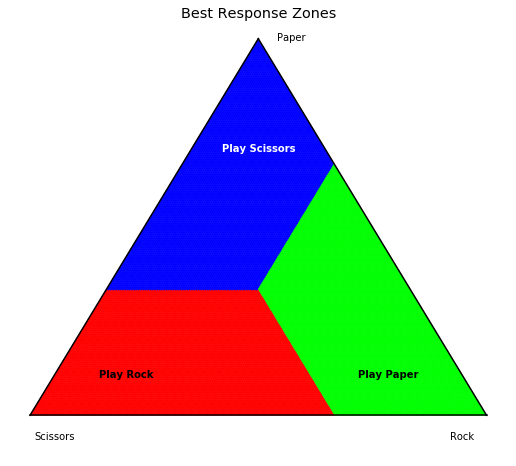

In [ ]:
# Adapted from https://github.com/marcharper/python-ternary/blob/master/README.md RGBA section
def generate_heatmap_data(scale=10):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k)
    return d

scale = 200
data = generate_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(9, 8)

tax.heatmap(data, style="hexagonal", use_rgba=True, colorbar = False)
tax.boundary()
tax.set_title("Best Response Zones")


# Label the corners
labels = 'Rock', 'Paper', 'Scissors' 
tax.right_corner_label(labels[0], position = (.88,0.05,.09), fontsize=10)
tax.top_corner_label(labels[1], position = (.01,1.11,.005),fontsize=10)
tax.left_corner_label(labels[2], position = (.07,0.05,1), fontsize=10)

# Label best response zones
tax.annotate("Play Rock", (.1* scale,.1 * scale,.8 * scale), weight = 'bold')
tax.annotate("Play Paper", (.8*scale, .1*scale, .1*scale), ha = 'right',  weight = 'bold')
tax.annotate("Play Scissors", (.15*scale, .7*scale, .15*scale), ha = 'center', color = 'white',  weight = 'bold')


# Clear background and axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.show()
